In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
style.context('dark_background')

In [3]:


def VisualizeMeSenpai(filter_, num_of_movies=5, top_num=10):
    '''
    This will create a visualization using preset styling based on microsoft colors
    valid filter_ choices are currently: 
    actor, actress, composer, writer, director, director of photography
    
    num_of movies: minimum number of works that have been attributed to displayed talent
    
    top_num: dictates how many talents will be displayed in the graph output
    '''
    MIC_OR = '#F25022'
    MIC_GR = '#7FBA00'
    MIC_BL = '#00A4EF'
    MIC_YL = '#FFB900'
    MIC_GY = '#737373'

    microsoft_color_list = [MIC_OR, MIC_GR, MIC_BL, MIC_YL, MIC_GY]

    df = pd.read_csv('../data/all_data.csv', index_col=0)

    col_dict = {'movie_id': 'Id', 
                'primary_title': 'MovieTitle',
                'persons_name': 'PersonName',
                'persons_job': 'PersonJob',
                'new_budget_api': 'Budget', 
                'new_ww_revenue_api': 'Revenue'}

    relevant_col = list(col_dict.keys())

    people_df = df[relevant_col].drop_duplicates()
    people_df.rename(columns=col_dict, inplace=True)

    job_filter = people_df['PersonJob'] == filter_

    job_df = people_df[job_filter]
    job_count_df = job_df.groupby('PersonName').count().reset_index()

    prolific_filter = job_count_df['Id'] >= num_of_movies

    prolific_df = job_count_df[prolific_filter]
    prolific_df.sort_values('Id', ascending=False).head()

    job_usefulness_df = job_df.groupby('PersonName').mean().reset_index()
    job_usefulness_df.sort_values('Revenue', ascending=False).head(30)

    prolific_list = list(prolific_df.PersonName)
    plot_df = job_usefulness_df.loc[job_usefulness_df.PersonName.isin(prolific_list)]
    plot_df = plot_df.nlargest(top_num,'Revenue')
    
    ax = sns.barplot(data=plot_df, 
                     y='PersonName',
                     x='Revenue', 
                     orient='h', 
                     color=np.random.choice(microsoft_color_list));
    
    ax.set(xlabel='Revenue', ylabel=filter_.title(), title=f'Average Revenue Per Movie, by {filter_.title()}')


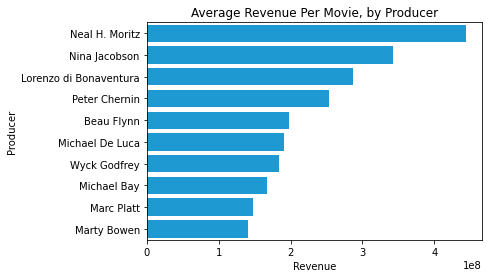

In [19]:
VisualizeMeSenpai('producer', 10, 10)